# Задание №1

Кладиева Алина, 18ИАД.

Датасет (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) содержит разного рода информацию о сотрудниках некоторой компании.

Описание некоторых признаков:<br>
<b>Education</b>:                1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor' <br>
<b>EnvironmentSatisfaction</b>:  1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>JobInvolvement</b>:           1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>JobSatisfaction</b>:          1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>PerformanceRating</b>:        1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding' <br>
<b>RelationshipSatisfaction</b>: 1 'Low' 2 'Medium' 3 'High' 4 'Very High' <br>
<b>WorkLifeBalance</b>:          1 'Bad' 2 'Good' 3 'Better' 4 'Best' <br>

<b>Attrition</b> - изнурён ли сотрудник своей работой (Yes/No) <br>
<b>OverTime</b> - Работает ли сотрудник во внерабочее время <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Чтение данных

In [3]:
raw_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=",")
raw_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
print(raw_data.shape)
print(raw_data.columns)

(1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
# Удалим несколько колонок с избыточной информацией для упрощения
data = raw_data.drop(["Over18", "EmployeeCount", "YearsWithCurrManager", "TrainingTimesLastYear", "HourlyRate", "DailyRate", "EmployeeNumber", "StockOptionLevel", "StandardHours"], axis=1)

In [6]:
print(data.shape)
print(data.columns)

(1470, 26)
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')


In [7]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,8,Yes,11,3,1,8,1,6,4,0
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,1,No,23,4,4,10,3,10,7,1
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,6,Yes,15,3,2,7,3,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,1,Yes,11,3,3,8,3,8,7,3
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,9,No,12,3,4,6,3,2,2,2


In [8]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,4,No,17,3,3,17,3,5,2,0
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,4,No,15,3,1,9,3,7,7,1
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,1,Yes,20,4,2,6,3,6,2,0
1468,49,No,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,2,No,14,3,4,17,2,9,6,0
1469,34,No,Travel_Rarely,Research & Development,8,3,Medical,2,Male,4,...,2,No,12,3,1,6,4,4,3,1


In [9]:
# Уникальные значения в колонке средствами Pandas
data["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [10]:
# Уикальные значения в колонке и их число средствам Numpy
np.unique(data["EducationField"], return_counts=True)

(array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other',
        'Technical Degree'], dtype=object),
 array([ 27, 606, 159, 464,  82, 132]))

In [11]:
data.at[1469, "Age"]

34

In [12]:
data["Department"][1469]

'Research & Development'

In [13]:
data[["Department", "Age", "TotalWorkingYears"]].head()

,Department,Age,TotalWorkingYears
0,Sales,41,8
1,Research & Development,49,10
2,Research & Development,37,7
3,Research & Development,33,8
4,Research & Development,27,6


In [14]:
# Можно видеть, например, что средний возраст сотрудников - около 37 лет (mean Age); 
# а максимальный срок работы в компании - 40 лет (max YearsAtCompany) 
data.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.761224,7.008163,4.229252,2.187755
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,0.706476,6.126525,3.623137,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000


In [15]:
data.describe(include = ['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


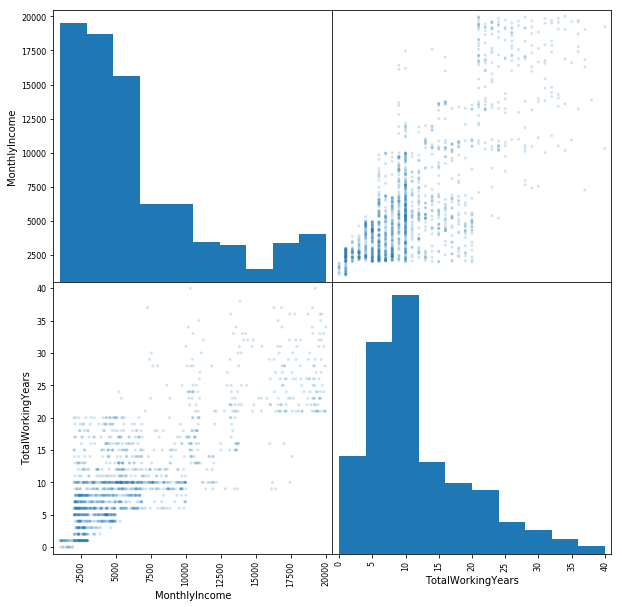

In [16]:
# Не рисую scatter matrix для всех признаков, т.к. она получается слишком огромная

# По графикам на главной диагонали видно, что доход большинства сотрудников - 2500-5000 у.е. в месяц; 
# и большая часть сотрудников работает в компании 5-10 лет

# По графикам вне главной диагонали видно, что ежемесячный доход, как правило, растёт вместе с общим числом 
# отработанных сотрудником лет
from pandas.plotting import scatter_matrix
scatter_matrix(data[["MonthlyIncome", "TotalWorkingYears"]], alpha = .2, figsize = (10, 10))
pass

In [17]:
correlations = data.corr()
correlations

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.680381,-0.021490,0.311309,0.212901,0.216513
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.026556,0.009508,0.018845,0.010029
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.148280,0.009819,0.069114,0.060236,0.054254
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,-0.002693,0.027627,0.001458,0.018007,0.016194
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,-0.005533,-0.014617,-0.021355,0.008717,-0.024184
JobLevel,0.509604,0.005303,0.101589,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.782208,0.037818,0.534739,0.389447,0.353885
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.772893,0.030683,0.514285,0.363818,0.344978
MonthlyRate,0.028051,0.027473,-0.026084,0.037600,-0.016322,0.039563,0.000644,0.034814,1.000000,0.017521,-0.006429,-0.009811,-0.004085,0.026442,0.007963,-0.023655,-0.012815,0.001567
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,0.142501,-0.055699,0.149515,0.017521,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.008366,-0.118421,-0.090754,-0.036814


In [18]:
# Найдем несколько наиболее коррелирующих между собой признаков. 
# Исключим единицы на главной диагонали (корреляции признаков самих с собой) и возьмем значения по модулю 
# (чтобы при сортировке учесть как положительные, так и отрицательные корреляции):
correlations = correlations.replace(1, 0).abs()
print(correlations.unstack().sort_values(kind="quicksort", ascending=False).head())

JobLevel           MonthlyIncome        0.950300
MonthlyIncome      JobLevel             0.950300
JobLevel           TotalWorkingYears    0.782208
TotalWorkingYears  JobLevel             0.782208
PercentSalaryHike  PerformanceRating    0.773550
dtype: float64


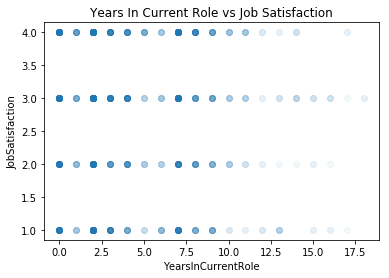

In [19]:
# Странно, но не похоже, что число лет проработанных на одной и той же должности влияет на удовлетворённость работой...
# Видно только, что мало кто в принципе долго работает на одной и той же должности 
plt.plot(data['YearsInCurrentRole'], data['JobSatisfaction'], 'o', alpha = 0.05)
plt.xlabel('YearsInCurrentRole')
plt.ylabel('JobSatisfaction')
plt.title('Years In Current Role vs Job Satisfaction')
pass

In [20]:
# И правда, эти признаки почти не коррелируют
correlations["YearsInCurrentRole"]["JobSatisfaction"]

0.0023047852298301056

In [21]:
# Посчитаем, сколько сотрудников имеют и не имеют медицинское образование
(data["EducationField"] == "Medical").value_counts()

False    1006
True      464
Name: EducationField, dtype: int64

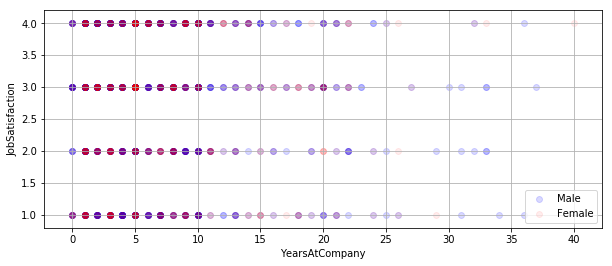

In [22]:
# Видно, что по большей части дольше всего в компании работают мужчины
# А степень удовлетворённости работой примерна одинаково распределена как для мужчин, так и для женщин
plt.figure(figsize = (10, 4))

np.random.seed(0)
job_sat_rnd = data['JobSatisfaction'] + np.random.randint(data.shape[0])

plt.scatter(data[data['Gender'] == "Male"]['YearsAtCompany'],
            data[data['Gender'] == "Male"]['JobSatisfaction'],
            alpha = 0.15,
            label = 'Male',
            color = 'b')

plt.scatter(data[data['Gender'] == "Female"]['YearsAtCompany'],
            data[data['Gender'] == "Female"]['JobSatisfaction'],
            alpha = 0.07,
            label = 'Female',
            color = 'r')

plt.xlabel('YearsAtCompany')
plt.ylabel('JobSatisfaction')
plt.legend()
plt.grid()

## Подготовка данных

In [23]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']


In [24]:
for c in categorical_columns:
    print(c, data[c].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
OverTime ['Yes' 'No']


In [25]:
# В таблице нет пропущенных значений
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
dtype: int64

In [26]:
data_describe = data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Attrition', 'Gender', 'OverTime'] ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


### Обработаем бинарные признаки

In [27]:
data.at[data['Gender'] == 'Male', 'Gender'] = 0
data.at[data['Gender'] == 'Female', 'Gender'] = 1
data["Gender"] = data["Gender"].astype('int64')

In [28]:
data.at[data['Attrition'] == 'No', 'Attrition'] = 0
data.at[data['Attrition'] == 'Yes', 'Attrition'] = 1
data["Attrition"] = data["Attrition"].astype('int64')

In [29]:
data.at[data['OverTime'] == 'No', 'OverTime'] = 0
data.at[data['OverTime'] == 'Yes', 'OverTime'] = 1
data["OverTime"] = data["OverTime"].astype('int64')

### Обработаем категориальные признаки

In [30]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')


In [31]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,11.279592,2.761224,7.008163,4.229252,2.187755
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,7.780782,0.706476,6.126525,3.623137,3.222430
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,9.000000,7.000000,3.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000


In [32]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-1.389667e-17,6.525392e-17,4.833624e-18,1.873029e-16,5.316986e-17,-1.812609e-17,-1.063397e-16,-3.866899e-17,2.779334e-17,8.458842e-18,1.885113e-16,-6.767074e-16,8.217161e-17,-3.141856e-17,-6.283711e-17,-9.667248e-18,1.075481e-16,-1.329247e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.071487e+00,-1.010565e+00,-1.867790e+00,-1.575150e+00,-2.431178e+00,-9.611593e-01,-1.567373e+00,-1.166946e+00,-1.716700e+00,-1.078138e+00,-1.150163e+00,-4.260850e-01,-1.583639e+00,-1.449673e+00,-2.492972e+00,-1.143905e+00,-1.167290e+00,-6.789146e-01
25%,-7.579120e-01,-8.872132e-01,-8.913849e-01,-6.603060e-01,-1.025818e+00,-9.611593e-01,-6.606284e-01,-7.629491e-01,-8.803444e-01,-6.778187e-01,-8.769340e-01,-4.260850e-01,-6.587487e-01,-6.785426e-01,-1.077495e+00,-6.542311e-01,-6.152822e-01,-6.789146e-01
50%,-1.011244e-01,-2.704519e-01,8.502032e-02,2.545383e-01,3.795430e-01,-5.776789e-02,2.461164e-01,-3.364371e-01,-1.090274e-02,-2.774999e-01,-3.304766e-01,-4.260850e-01,2.661420e-01,-1.644554e-01,3.379811e-01,-3.277818e-01,-3.392783e-01,-3.685899e-01
75%,6.651278e-01,5.930139e-01,1.061426e+00,1.169383e+00,3.795430e-01,8.456235e-01,1.152861e+00,3.984889e-01,8.638074e-01,5.231377e-01,7.624382e-01,-4.260850e-01,1.191033e+00,4.781535e-01,3.379811e-01,3.251169e-01,7.647374e-01,2.520597e-01
max,2.526026e+00,2.443298e+00,2.037831e+00,1.169383e+00,1.784904e+00,2.652406e+00,1.152861e+00,2.866651e+00,1.782281e+00,2.524732e+00,2.675039e+00,2.345353e+00,1.191033e+00,3.691198e+00,1.753458e+00,5.385081e+00,3.800780e+00,3.975957e+00


In [33]:
# Соединим все вместе
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(1470, 45)


### Решим задачу предсказания "выгорания" сотрудника на работе по его личным данным

In [34]:
X = data.drop(('Attrition'), axis = 1) 
y = data['Attrition']
feature_names = X.columns

In [35]:
# Разделим выборку на обучающую и тестовую (30% тестовая, 70%  обучающая)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Метод K ближайших соседей

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Для начала возьмем число соседей наугад, пусть это будет 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

# Сохраним значение ошибки на тестовой выборке для метода 5ти ближайших соседей
err_test_before_parameter_selection = err_test

0.137026239067 0.131519274376


In [38]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[377   3]
 [ 55   6]]


In [39]:
# Проведем подбор параметра K для метода kNN 
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.162293488824 10


In [40]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Сохраним значение ошибки на тестовой выборке для метода 10ти ближайших соседей (подобранный параметр)
err_test_after_parameter_selection = err_test

0.157434402332 0.140589569161


In [41]:
# Посчитаем, насколько уменьшилась ошибка после подбора наилучшего параметра
err_diff = err_test_after_parameter_selection - err_test_before_parameter_selection
err_diff

0.0090702947845805182

In [42]:
# Попробуем воспользоваться методом кросс-валидации (разобьем данные на 10 блоков для поочередного использования одного из них в качестве тестовой выборки)
from sklearn import cross_validation
knn_scores = cross_validation.cross_val_score(knn, X, y, cv = 10)
knn_errors = 1 - knn_scores # Поскольку раньше мы оперировали ошибками, для удобства посчитаем ошибку и тут
print(knn_errors)
knn_errors.mean()

c:\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.14864865  0.16216216  0.16216216  0.15646259  0.15646259  0.15646259
  0.15646259  0.15068493  0.15753425  0.15068493]


0.15577274226980684

Кросс-валидация для метода kNN дала большую ошибку, чем была при единичном разбиении (т.е. удачность разбиения действительно влияет на результат, и в теории, не использование кросс-валидации может ввести в заблуждение относительно качества модели). Ошибка для каждого варианта разбиения в данном случае варьируется в пределах +-1% (не очень сильно, что показывает, что датасет составлен хорошо) 

### SVC

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.115646258503 0.133786848073


In [44]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

c:\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.12730806608357625 100.0


### Random Forest

In [45]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.12925170068


### Extremely Randomized Trees

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.124716553288


### AdaBoost

In [47]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0272108843537 0.167800453515


### GBT

In [48]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.12925170068


Наилучшие результаты (наим.ошибку) на тестовой выборке показали алгоритмы GBT и Extremely Randomized Trees. Возможно, результаты были бы несколько другими, если бы во всех перечисленных методах использовалась кросс-валидация.

### Значимость признаков

In [49]:
N, d = X.shape
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'MonthlyIncome' (0.088364)
 2. feature '  Age' (0.072593)
 3. feature 'TotalWorkingYears' (0.059843)
 4. feature 'OverTime' (0.059310)
 5. feature 'MonthlyRate' (0.057574)
 6. feature 'DistanceFromHome' (0.054073)
 7. feature 'YearsAtCompany' (0.053702)
 8. feature 'NumCompaniesWorked' (0.043090)
 9. feature 'YearsInCurrentRole' (0.041503)
10. feature 'PercentSalaryHike' (0.038859)
11. feature 'MaritalStatus_Single' (0.030572)
12. feature 'EnvironmentSatisfaction' (0.030462)
13. feature 'YearsSinceLastPromotion' (0.030290)
14. feature 'JobSatisfaction' (0.029122)
15. feature 'RelationshipSatisfaction' (0.027692)
16. feature 'JobInvolvement' (0.025262)
17. feature 'WorkLifeBalance' (0.024636)
18. feature 'Education' (0.023622)
19. feature 'JobLevel' (0.023247)
20. feature 'BusinessTravel_Travel_Frequently' (0.014648)
21. feature 'Gender' (0.012529)
22. feature 'MaritalStatus_Divorced' (0.011345)
23. feature 'MaritalStatus_Married' (0.010900)
24. feature 'Edu

(-1, 20)

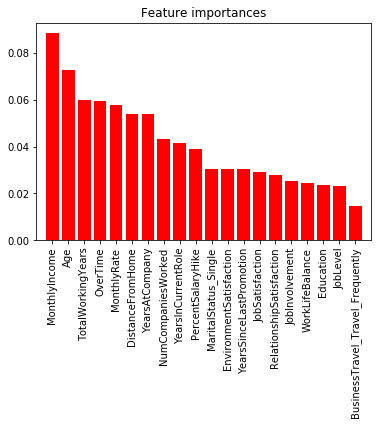

In [50]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])